In [110]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [111]:
data=pd.read_csv("C:/Users/shrikishan soni/OneDrive/Desktop/spark internship/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [112]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [113]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data["Species"]=label_encoder.fit_transform(data["Species"])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [114]:
x=data.drop(["Species","Id"],axis="columns")

In [115]:
y=data["Species"]

In [116]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [117]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [118]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [119]:
x.shape

(150, 4)

In [120]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Here sepallength have good correlation with petallength and  petalwidth,sepalwidth are fairly correlated with petallength and petalwidth,petal dimension are highly correlated with each other

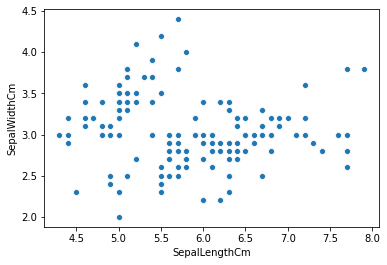

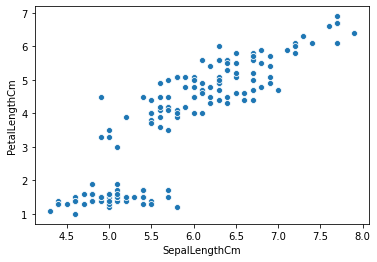

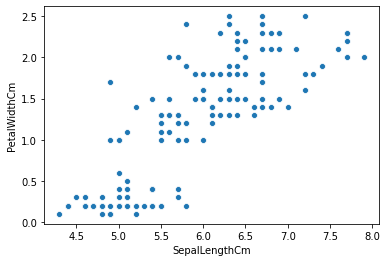

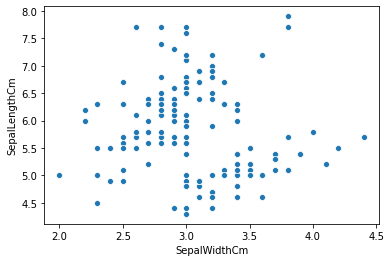

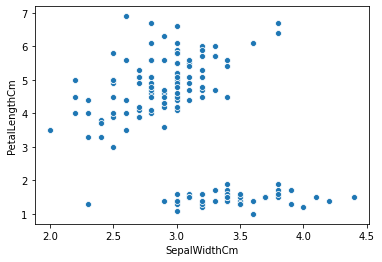

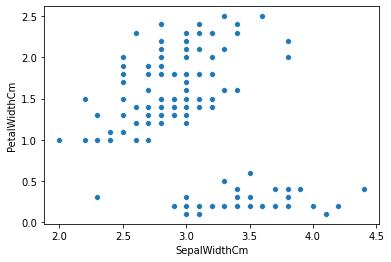

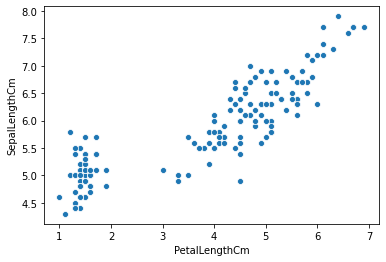

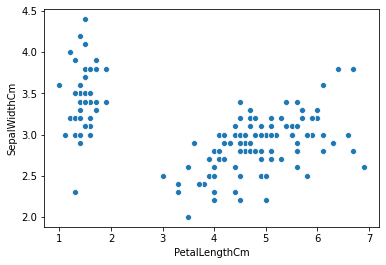

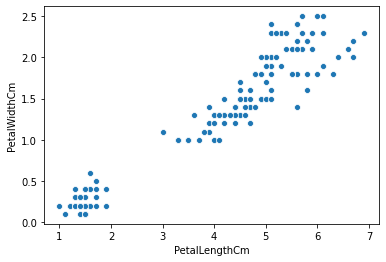

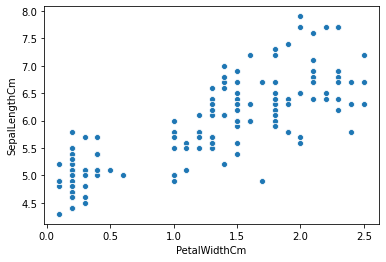

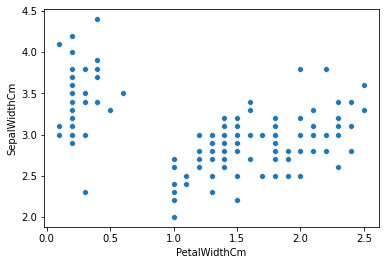

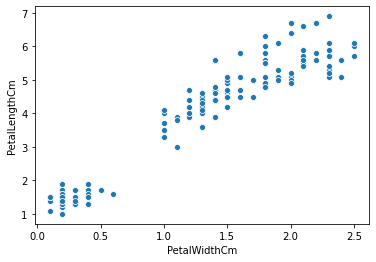

In [123]:
for i in x.columns:
    for j in x.columns:
        if i!=j:
            sb.scatterplot(i,j,data=x)
            plt.show()

In [124]:
cluster_range=range(2,10)
cluster_wss=[]
from sklearn.cluster import KMeans
for num_cluster in cluster_range:
    cluster = KMeans(num_cluster,random_state=25)
    cluster.fit(x)
    cluster_wss.append(cluster.inertia_)

In [125]:
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_wss':cluster_wss})
cluster_df

,num_cluster,cluster_wss
0,2,152.368706
1,3,78.940841
2,4,57.345409
3,5,46.535582
4,6,38.930963
5,7,34.196982
6,8,29.889179
7,9,27.879288


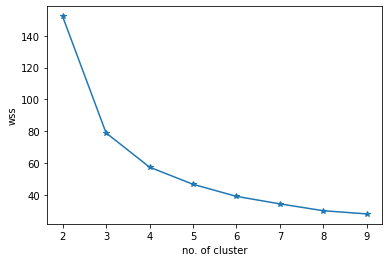

In [126]:
plt.xlabel('no. of cluster')
plt.ylabel("wss")
plt.plot(cluster_df["num_cluster"],cluster_df["cluster_wss"],marker="*")

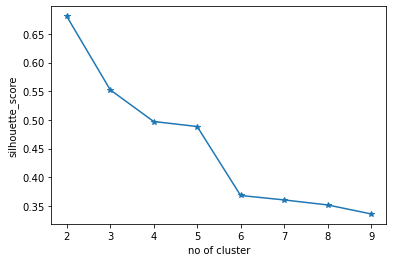

In [127]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
sil=[]
for num_cluster in cluster_range:
    cluster=KMeans(num_cluster,random_state=25)
    cluster.fit(x)
    score = silhouette_score(x,cluster.labels_)
    sil.append(score)
plt.xlabel("no of cluster")
plt.ylabel("silhouette_score")
plt.plot(cluster_range,sil,marker='*')
plt.show()

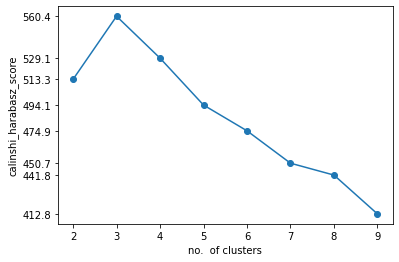

In [128]:
cal=[]
for num_cluster in cluster_range:
    mod=KMeans(num_cluster,random_state=25)
    mod.fit(x)
    score=calinski_harabasz_score(x,mod.labels_)
    cal.append(score)
plt.plot(cluster_range,cal,marker="o")
plt.xlabel("no.  of clusters")
plt.ylabel("calinshi_harabasz_score")
plt.xticks(cluster_range)
plt.yticks(cal)
plt.show()

In [129]:
df_2=x.copy()
df_3=x.copy()


In [130]:
Kclusters=KMeans(n_clusters=2,random_state=25)
Kclusters.fit(df_2)
df_2["clus"]=Kclusters.predict(df_2)
Kclusters=KMeans(n_clusters=3,random_state=25)
Kclusters.fit(df_3)
df_3["clus"]=Kclusters.predict(df_3)

In [131]:
clus_profile=df_2.groupby(df_2["clus"]).mean()
clus_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clus,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.360377,1.562264,0.288679


#visulisation

when take 2 clusters


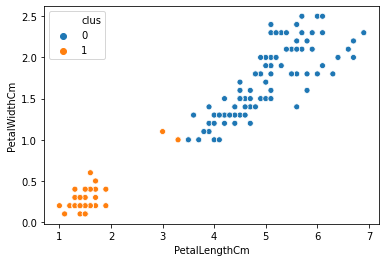

when take 3 clusters


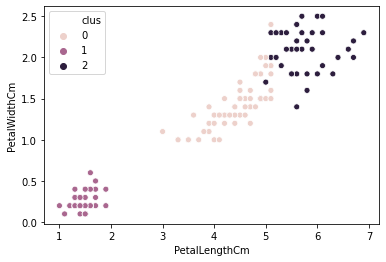

In [132]:
print("when take 2 clusters")
sb.scatterplot(df_2[df_2.columns[2]],df_2[df_2.columns[3]],hue=df_2[df_2.columns[-1]])
plt.show()
print("when take 3 clusters")
sb.scatterplot(df_3[df_3.columns[2]],df_3[df_3.columns[3]],hue=df_3[df_3.columns[-1]])
plt.show()

when take 2 clusters


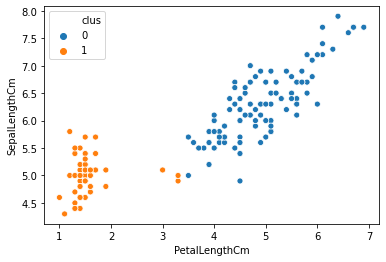

when take 3 clusters


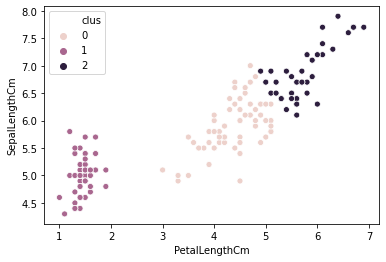

In [133]:
print("when take 2 clusters")
sb.scatterplot(df_2[df_2.columns[2]],df_2[df_2.columns[0]],hue=df_2[df_2.columns[-1]])
plt.show()
print("when take 3 clusters")
sb.scatterplot(df_3[df_3.columns[2]],df_3[df_3.columns[0]],hue=df_3[df_3.columns[-1]])
plt.show()